Atendimentos de Consultas
Governo do Distrito Federal em http://dados.df.gov.br/dataset/atendimentos-e-consultas

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('sia012017.csv', encoding='cp1252')
df.head()

,ano_mes,estabelecimento_cnes,complexidade,cod_grupo,grupo,cod_subgrupo,cod_procedimento,procedimento,quantidade,cod_carater_atendimento,carater_atendimento,cod_forma_organizacao
0,201701,0010499 HRT Hospital Regional de Taguatinga,Atenção Básica,1,01- Ações de Promoção e Prevenção em Saúde,101,101020058,Aplicação de Cariostático (por Dente),18,1,Eletivo,10102
1,201701,0010537 HMIB Hospital Materno Infantil de Bras...,Atenção Básica,1,01- Ações de Promoção e Prevenção em Saúde,101,101020058,Aplicação de Cariostático (por Dente),1,1,Eletivo,10102
2,201701,0010499 HRT Hospital Regional de Taguatinga,Atenção Básica,1,01- Ações de Promoção e Prevenção em Saúde,101,101020058,Aplicação de Cariostático (por Dente),26,1,Eletivo,10102
3,201701,0010499 HRT Hospital Regional de Taguatinga,Atenção Básica,1,01- Ações de Promoção e Prevenção em Saúde,101,101020058,Aplicação de Cariostático (por Dente),12,1,Eletivo,10102
4,201701,0010499 HRT Hospital Regional de Taguatinga,Atenção Básica,1,01- Ações de Promoção e Prevenção em Saúde,101,101020058,Aplicação de Cariostático (por Dente),12,1,Eletivo,10102


In [3]:
#verificando tamanho do df (linhas e colunas)
df.shape

(174870, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174870 entries, 0 to 174869
Data columns (total 12 columns):
ano_mes                    174870 non-null int64
estabelecimento_cnes       174870 non-null object
complexidade               174870 non-null object
cod_grupo                  174870 non-null int64
grupo                      174870 non-null object
cod_subgrupo               174870 non-null int64
cod_procedimento           174870 non-null int64
procedimento               174870 non-null object
quantidade                 174870 non-null int64
cod_carater_atendimento    174870 non-null int64
carater_atendimento        174870 non-null object
cod_forma_organizacao      174870 non-null int64
dtypes: int64(7), object(5)
memory usage: 12.7+ MB


In [5]:
#quais foram os 10 locais que mais realizaram atendimentos? quantos?
df.groupby('estabelecimento_cnes')['quantidade'].sum().sort_values(ascending=False).head(10)                      

estabelecimento_cnes
2816741 Farmacia de Alto Custo Asa Sul                   674022
6926967 Farmacia de Alto Custo Ceilândia                 466874
0010456 HBDF Hospital de Base do Distrito Federal        224600
0010464 HRAN Hospital Regional da Asa Norte              119804
0010510 HUB Hospital Universitario de Brasília           109263
0010499 HRT Hospital Regional de Taguatinga               86088
7765916 Central de Regulação do SAMU Distrito Federal     82699
0010529 HRPl Hospital Regional de Planaltina              79004
7465157 UPA Ceilândia                                     75329
0011339 FHB Fundacao Hemocentro de Brasília               70908
Name: quantidade, dtype: int64

In [6]:
#quais foram os 10 procedimentos mais realizados?
df.groupby('procedimento')['quantidade'].sum().sort_values(ascending=False).head(10)                        

procedimento
Atendimento de Urgência em Atencão Especializada                                                       139201
Consulta Medica em Atenção Especializada                                                               128235
Tacrolimo 1 Mg (por Capsula)                                                                           115277
Consulta Medica em Atençao Basica                                                                      108043
Afericão de Pressao Artérial                                                                            79885
Sevelamer 800 Mg (por Comprimido)                                                                       75810
Complemento Alimentar p/ Paciente Fenilcetonurico Maior de 1 Ano - Formula de Aminoácidos Isenta De     72936
Samu 192:atendimento das Chamadas Recebidas Pela Central de Regulação das Urgências                     69905
Atorvastatina 20 Mg (por Comprimido)                                                                    669

In [7]:
#quais foram os 10 procedimentos menos procurados?
df.groupby('procedimento')['quantidade'].sum().sort_values(ascending=True).head(10)                    

procedimento
Entecavir 1.0 Mg (por Comprimido)                          0
Galantamina 16 Mg (por Capsula de Liberação Prolongada)    0
Primidona 100 Mg (por Comprimido)                          0
Clobazam 10 Mg (por Comprimido)                            0
Codeina 30 Mg (por Comprimido)                             0
Morfina 10 Mg (por Comprimido)                             0
Metadona 10 Mg (por Comprimido)                            0
Naproxeno 500 Mg (por Comprimido)                          0
Mesalazina 800 Mg - por Comprimidoÿ                        0
Mesalazina 3 G + Diluente 100 Ml (enema) - por Dose        0
Name: quantidade, dtype: int64

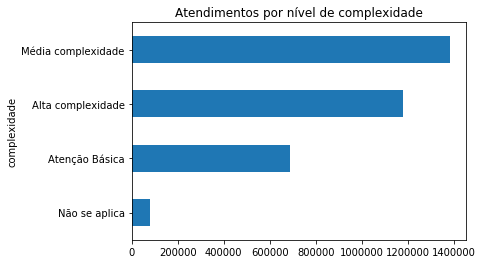

In [8]:
#gráfico de atendimentos por nível de complexidade
df.groupby('complexidade')['quantidade'].sum().sort_values().plot.barh(title='Atendimentos por nível de complexidade')

In [9]:
#quais são os grupos de procedimentos atendidos por ordem de procura dos pacientes?
df.groupby('grupo')['quantidade'].sum().sort_values(ascending=False)

grupo
06 - Medicamentos                                                                        1143316
02 - Procedimentos com Finalidade Diagnóstica                                            1027314
03 - Procedimentos Clínicos                                                               980273
01- Ações de Promoção e Prevenção em Saúde                                                143493
04 - Procedimentos Cirúrgicos                                                              21747
08 - Ações Complementares da Atenção à Saúde, Órteses, Próteses e Materiais Especiais       6358
07 - Órteses, Próteses e Materiais Especiais                                                4646
05 - Transplantes de Orgãos, Tecidos e Células                                              3214
Name: quantidade, dtype: int64

In [10]:
#quais são os tipos de atendimentos por carater?
df.groupby('carater_atendimento')['quantidade'].sum().sort_values(ascending=False)

carater_atendimento
Informação inexistente  (bpa-c)                       2085728
Eletivo                                               1241302
Urgência                                                 3330
Acidente no local trabalho ou a serviço da empresa          1
Name: quantidade, dtype: int64

In [11]:
#quantidade total de atendimentos da base?
df['quantidade'].sum()

3330361